In [13]:
import os
import pandas as pd 
import seaborn as sns
folder_path = {"Auvergne":"/home/onyxia/work/Python_Project_2A/data/RTE/Auvergne",
                "Bourgone":"/home/onyxia/work/Python_Project_2A/data/RTE/Bourgogne",
                "Bretagne":"/home/onyxia/work/Python_Project_2A/data/RTE/Bretagne",
                "Centre_Val":"/home/onyxia/work/Python_Project_2A/data/RTE/Centre_Val",
                "Grand_est":"/home/onyxia/work/Python_Project_2A/data/RTE/Grand_est",
                "Hauts-de-france":"/home/onyxia/work/Python_Project_2A/data/RTE/Hauts_de_france",
                "Île-de-France":"/home/onyxia/work/Python_Project_2A/data/RTE/Ile-de-france",
                "Normandie":"/home/onyxia/work/Python_Project_2A/data/RTE/Normandie",
                "Nouvelle-Aquitaine":"/home/onyxia/work/Python_Project_2A/data/RTE/Nouvelle_aquitaine",
                "Occitanie":"/home/onyxia/work/Python_Project_2A/data/RTE/Occitaine",
                "Pays-de-la-loire":"/home/onyxia/work/Python_Project_2A/data/RTE/Pays_de_la_loire",
                "Provence-Alpes-Côte d'Azur":"/home/onyxia/work/Python_Project_2A/data/RTE/PACA"}

In [14]:
paths_file = []
for ele in folder_path.items():
    for xls in os.listdir(ele[1]):
        if xls.endswith(".xls"):
            file_xls = os.path.join(ele[1],xls)
            paths_file.append(file_xls)
paths_file

['/home/onyxia/work/Python_Project_2A/data/RTE/Auvergne/eCO2mix_RTE_Auvergne-Rhone-Alpes_Annuel-Definitif_2020.xls',
 '/home/onyxia/work/Python_Project_2A/data/RTE/Auvergne/eCO2mix_RTE_Auvergne-Rhone-Alpes_Annuel-Definitif_2024.xls',
 '/home/onyxia/work/Python_Project_2A/data/RTE/Auvergne/eCO2mix_RTE_Auvergne-Rhone-Alpes_Annuel-Definitif_2023.xls',
 '/home/onyxia/work/Python_Project_2A/data/RTE/Auvergne/eCO2mix_RTE_Auvergne-Rhone-Alpes_Annuel-Definitif_2021.xls',
 '/home/onyxia/work/Python_Project_2A/data/RTE/Auvergne/eCO2mix_RTE_Auvergne-Rhone-Alpes_Annuel-Definitif_2022.xls',
 '/home/onyxia/work/Python_Project_2A/data/RTE/Bourgogne/eCO2mix_RTE_Bourgogne-Franche-Comt‚_Annuel-Definitif_2022.xls',
 '/home/onyxia/work/Python_Project_2A/data/RTE/Bourgogne/eCO2mix_RTE_Bourgogne-Franche-Comt‚_Annuel-Definitif_2023.xls',
 '/home/onyxia/work/Python_Project_2A/data/RTE/Bourgogne/eCO2mix_RTE_Bourgogne-Franche-Comt‚_Annuel-Definitif_2020.xls',
 '/home/onyxia/work/Python_Project_2A/data/RTE/Bourg

In [15]:

dfs = []
for file in paths_file:
    df = pd.read_csv(file, sep='\t', encoding='latin-1')
    dfs.append(df)
    

df_ele = pd.concat(dfs, ignore_index=True)

/tmp/ipykernel_25255/3235562506.py:3: DtypeWarning: Columns (12,13,14,15,18,20,25,26,28,30,32,37,38,40,44,47,51,54) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, sep='\t', encoding='latin-1')
/tmp/ipykernel_25255/3235562506.py:3: DtypeWarning: Columns (12,13,14,15,17,20,21,23,29,32,33,35,47,54) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, sep='\t', encoding='latin-1')
/tmp/ipykernel_25255/3235562506.py:3: DtypeWarning: Columns (12,13,14,15,24,27,36,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, sep='\t', encoding='latin-1')
/tmp/ipykernel_25255/3235562506.py:3: DtypeWarning: Columns (12,13,14,15,17,18,23,24,25,27,29,30,35,36,37,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, sep='\t', encoding='latin-1')
/tmp/ipykernel_25255/3235562506.py:3: DtypeWarning: Columns (12,13,1

In [16]:
df_ele.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2104764 entries, 0 to 2104763
Columns: 389 entries, Périmètre to Flux physiques de PACA vers Suisse
dtypes: float64(20), object(369)
memory usage: 6.1+ GB


In [17]:
feauture = ['Périmètre','Nature','Date','Heures','Consommation']
df_con = df_ele[feauture].copy()


In [18]:
df_con.isnull().sum()

Périmètre             0
Nature               60
Date                 60
Heures               60
Consommation    1052412
dtype: int64

<Axes: >

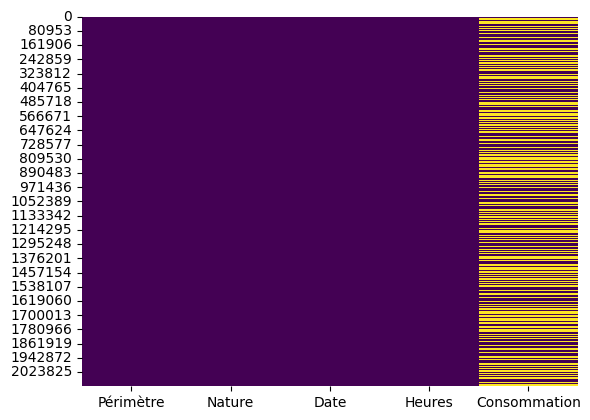

In [19]:
sns.heatmap(df_con.isnull(),cbar=False,cmap='viridis')

### Distribution of consommation before drop NaN

array([[<Axes: title={'center': 'Consommation'}>]], dtype=object)

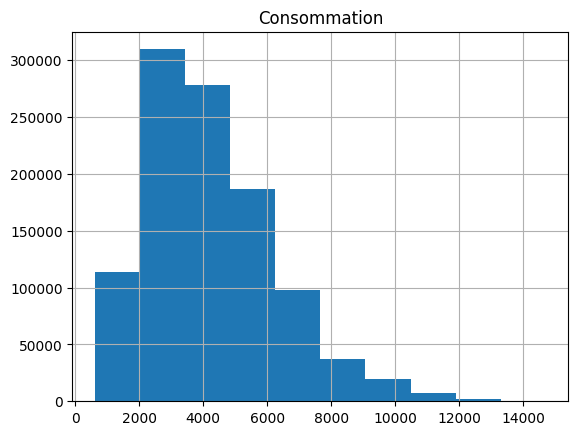

In [20]:
df_con[['Consommation']].hist()

In [21]:
df_con = df_con.dropna()


<Axes: >

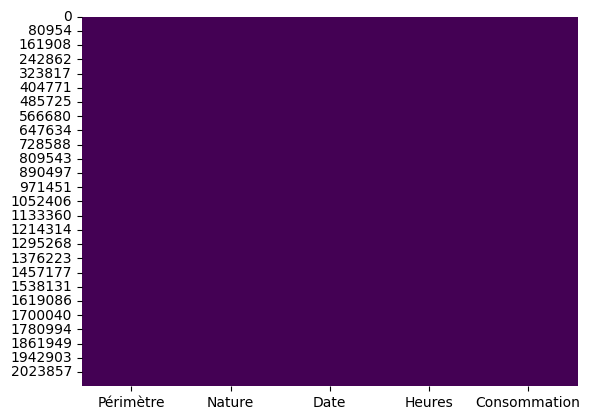

In [22]:
sns.heatmap(df_con.isnull(),cbar=False,cmap='viridis')

In [23]:
df_con.to_csv("data_ele-2020-2024.csv", index=False)